# EMOTION DETECTION FROM TEXT


# IMPORT NECESSARY LIBRARIES

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import pandas as pd
df=pd.read_csv("Emotion_final.csv")

In [26]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


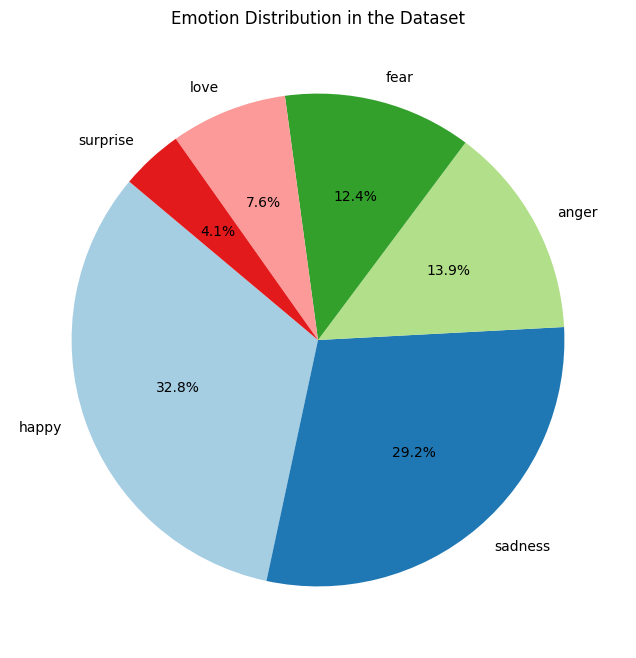

In [27]:
emotion_counts = df['Emotion'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Emotion Distribution in the Dataset')
plt.show()

In [28]:
df['Emotion'].value_counts()

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

# RNN MODEL



Epoch 1/5


135/135 [==============================] - 10s 62ms/step - loss: 1.5555 - accuracy: 0.3691 - val_loss: 1.5012 - val_accuracy: 0.4054
Epoch 2/5
135/135 [==============================] - 8s 56ms/step - loss: 0.8613 - accuracy: 0.7035 - val_loss: 0.6260 - val_accuracy: 0.7922
Epoch 3/5
135/135 [==============================] - 8s 56ms/step - loss: 0.3557 - accuracy: 0.8859 - val_loss: 0.5255 - val_accuracy: 0.8267
Epoch 4/5
135/135 [==============================] - 8s 56ms/step - loss: 0.2450 - accuracy: 0.9236 - val_loss: 0.8209 - val_accuracy: 0.7332
Epoch 5/5
135/135 [==============================] - 1s 10ms/step - loss: 0.6207 - accuracy: 0.8108
RNN Accuracy: 0.8108108043670654


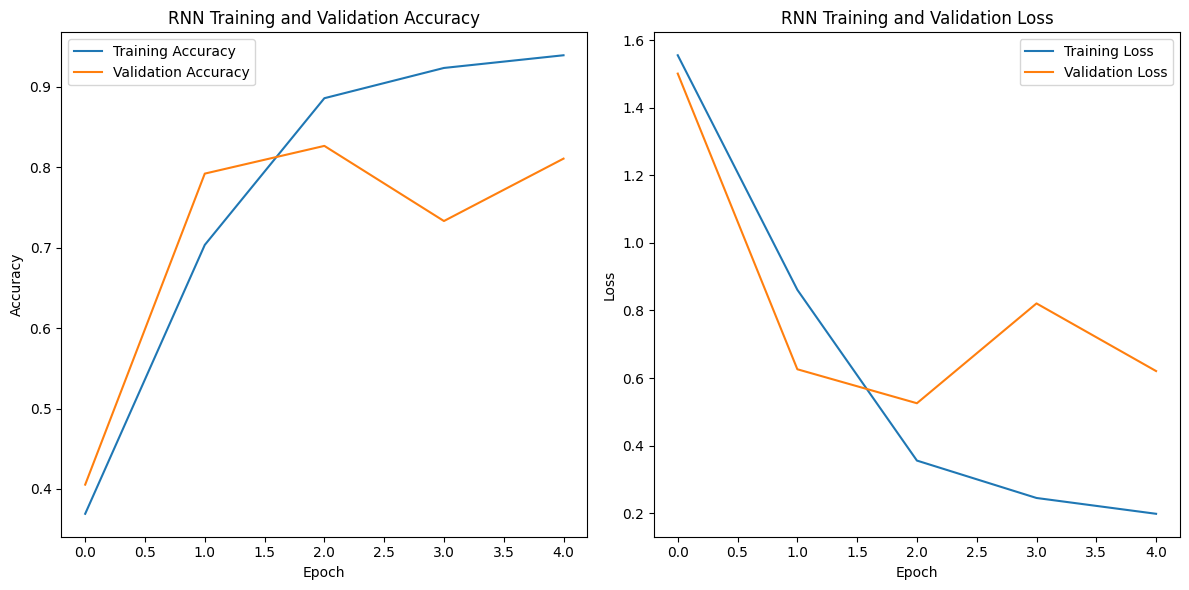

135/135 [==============================] - 2s 10ms/step


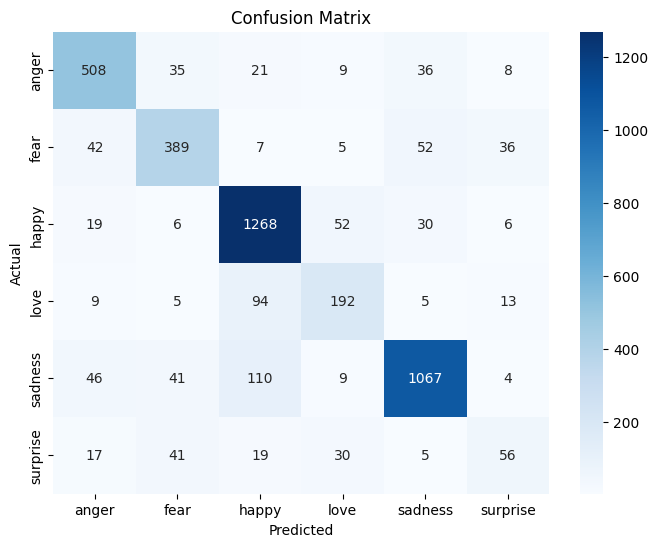

RNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       617
           1       0.75      0.73      0.74       531
           2       0.83      0.92      0.87      1381
           3       0.65      0.60      0.62       318
           4       0.89      0.84      0.86      1277
           5       0.46      0.33      0.38       168

    accuracy                           0.81      4292
   macro avg       0.73      0.71      0.72      4292
weighted avg       0.81      0.81      0.81      4292



In [4]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data Preprocessing
label_encoder = LabelEncoder()
df['Emotion'] = label_encoder.fit_transform(df['Emotion'])

max_words = 5000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(df['Text'])
X = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(X)

X_train, X_test, y_train, y_test = train_test_split(X, df['Emotion'].values, test_size=0.2, random_state=42)

# Build RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(max_words, 128, input_length=X.shape[1]))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(6, activation='softmax'))
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train RNN model and collect training history
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Evaluate RNN model
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test, y_test)
print(f'RNN Accuracy: {rnn_accuracy}')

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot RNN accuracy
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot RNN loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
y_pred_rnn_probs = model_rnn.predict(X_test)
y_pred_rnn = np.argmax(y_pred_rnn_probs, axis=1)

def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot RNN Confusion Matrix
conf_matrix_rnn = confusion_matrix(y_test, y_pred_rnn)
plot_confusion_matrix(conf_matrix_rnn, label_encoder.classes_)

# Classification Report
class_report_rnn = classification_report(y_test, y_pred_rnn)
print("RNN Classification Report:")
print(class_report_rnn)

# LSTM MODEL

Epoch 1/5
135/135 [==============================] - 30s 200ms/step - loss: 1.4119 - accuracy: 0.4484 - val_loss: 0.8701 - val_accuracy: 0.7374
Epoch 2/5
135/135 [==============================] - 25s 188ms/step - loss: 0.5298 - accuracy: 0.8216 - val_loss: 0.3724 - val_accuracy: 0.8802
Epoch 3/5
135/135 [==============================] - 26s 193ms/step - loss: 0.2204 - accuracy: 0.9300 - val_loss: 0.3281 - val_accuracy: 0.8921
Epoch 4/5
135/135 [==============================] - 26s 195ms/step - loss: 0.1385 - accuracy: 0.9535 - val_loss: 0.2775 - val_accuracy: 0.9089
Epoch 5/5
135/135 [==============================] - 4s 30ms/step - loss: 0.3105 - accuracy: 0.9021
LSTM Accuracy: 0.9021435379981995


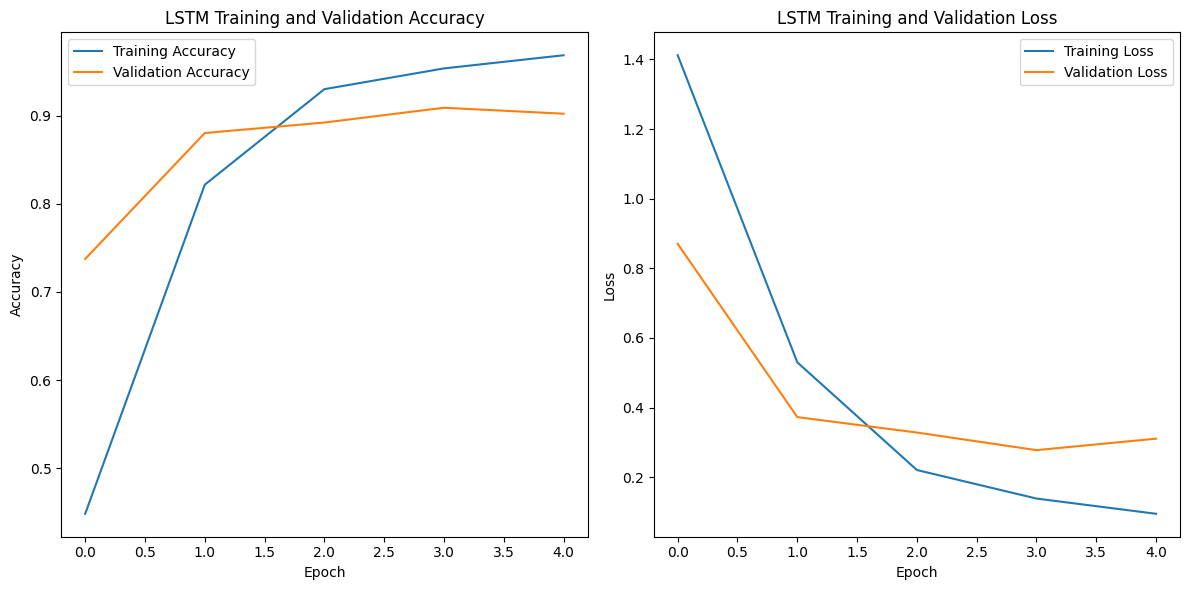

135/135 [==============================] - 4s 27ms/step


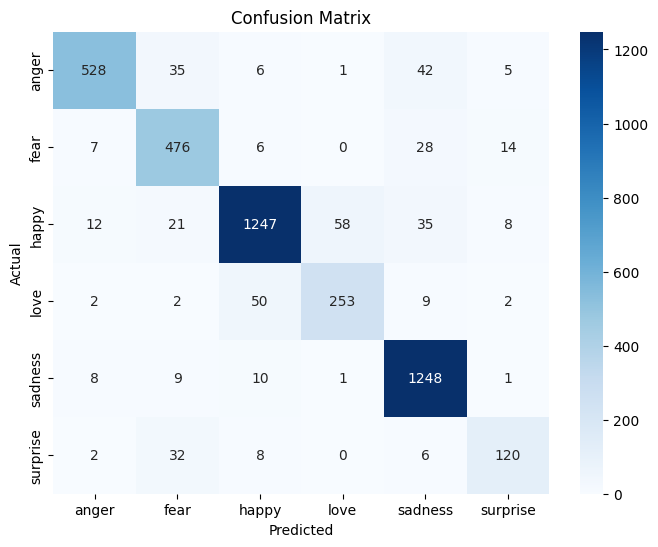

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       617
           1       0.83      0.90      0.86       531
           2       0.94      0.90      0.92      1381
           3       0.81      0.80      0.80       318
           4       0.91      0.98      0.94      1277
           5       0.80      0.71      0.75       168

    accuracy                           0.90      4292
   macro avg       0.87      0.86      0.86      4292
weighted avg       0.90      0.90      0.90      4292



In [6]:
from tensorflow.keras.layers import LSTM

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128, input_length=X.shape[1]))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(6, activation='softmax'))
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model and collect training history
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Evaluate LSTM model
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test, y_test)
print(f'LSTM Accuracy: {lstm_accuracy}')

# Plot training and validation accuracy/loss for LSTM
plt.figure(figsize=(12, 6))

# Plot LSTM accuracy
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot LSTM loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
y_pred_lstm_probs = model_lstm.predict(X_test)
y_pred_lstm = np.argmax(y_pred_lstm_probs, axis=1)

# Plot LSTM Confusion Matrix
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
plot_confusion_matrix(conf_matrix_lstm, label_encoder.classes_)

# Classification Report
class_report_lstm = classification_report(y_test, y_pred_lstm)
print("LSTM Classification Report:")
print(class_report_lstm)

# Detailed Information about LSTM Model Layers

In [9]:
print("Detailed Information about LSTM Model Layers:")
for layer in model_lstm.layers:
    print(f"{layer.name} - {layer.__class__.__name__}")
    print(f"   Input shape: {layer.input_shape}")
    print(f"   Output shape: {layer.output_shape}")
    print(f"   Number of parameters: {layer.count_params()}")
    print("="*50)


Detailed Information about LSTM Model Layers:
embedding_2 - Embedding
   Input shape: (None, 63)
   Output shape: (None, 63, 128)
   Number of parameters: 640000
lstm_1 - LSTM
   Input shape: (None, 63, 128)
   Output shape: (None, 128)
   Number of parameters: 131584
dense_2 - Dense
   Input shape: (None, 128)
   Output shape: (None, 6)
   Number of parameters: 774


# BiLSTM - UNITS(128) WITHOUT DROPOUT

Epoch 1/5
135/135 [==============================] - 29s 181ms/step - loss: 1.3572 - accuracy: 0.4811 - val_loss: 0.8290 - val_accuracy: 0.7418
Epoch 2/5
135/135 [==============================] - 22s 161ms/step - loss: 0.5762 - accuracy: 0.8084 - val_loss: 0.4611 - val_accuracy: 0.8488
Epoch 3/5
135/135 [==============================] - 21s 159ms/step - loss: 0.2798 - accuracy: 0.9090 - val_loss: 0.3171 - val_accuracy: 0.8979
Epoch 4/5
135/135 [==============================] - 21s 156ms/step - loss: 0.1533 - accuracy: 0.9493 - val_loss: 0.2647 - val_accuracy: 0.9122
Epoch 5/5
135/135 [==============================] - 4s 26ms/step - loss: 0.2755 - accuracy: 0.9136
BiLSTM Accuracy: 0.9135600924491882


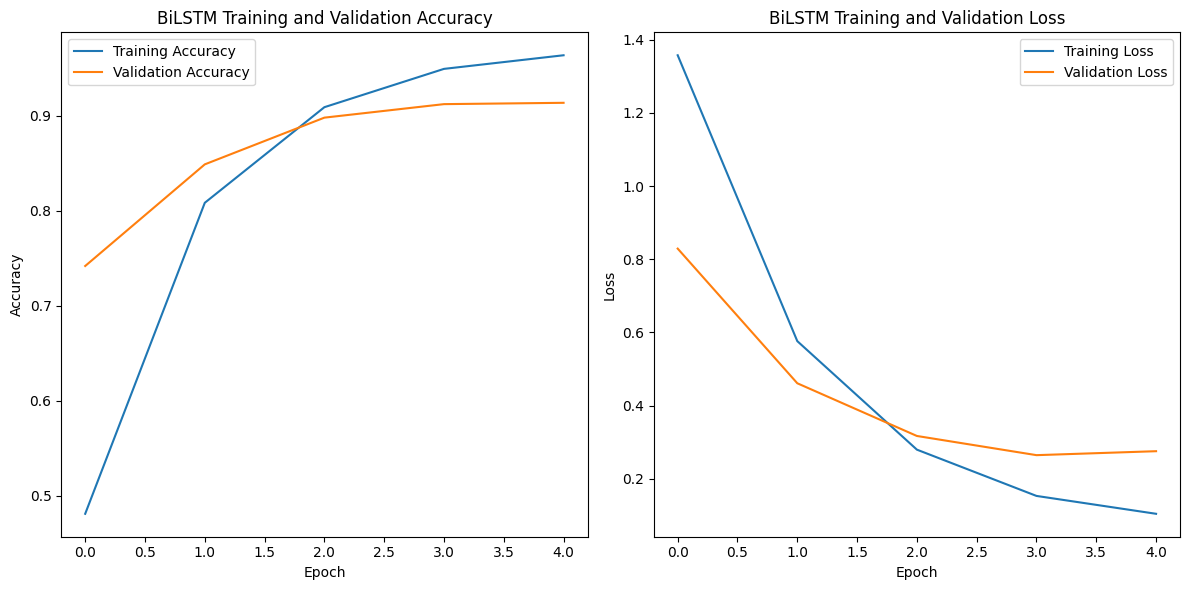

135/135 [==============================] - 4s 26ms/step


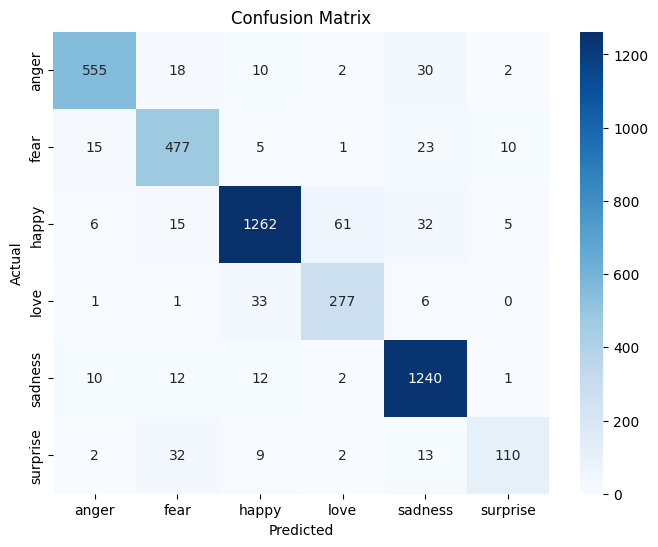

BiLSTM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       617
           1       0.86      0.90      0.88       531
           2       0.95      0.91      0.93      1381
           3       0.80      0.87      0.84       318
           4       0.92      0.97      0.95      1277
           5       0.86      0.65      0.74       168

    accuracy                           0.91      4292
   macro avg       0.89      0.87      0.88      4292
weighted avg       0.91      0.91      0.91      4292



In [5]:
from tensorflow.keras.layers import Bidirectional, LSTM

# Build BiLSTM model
model_bilstm = Sequential()
model_bilstm.add(Embedding(max_words, 128, input_length=X.shape[1]))
model_bilstm.add(Bidirectional(LSTM(128)))
model_bilstm.add(Dense(6, activation='softmax'))
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train BiLSTM model and collect training history
history_bilstm = model_bilstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Evaluate BiLSTM model
bilstm_loss, bilstm_accuracy = model_bilstm.evaluate(X_test, y_test)
print(f'BiLSTM Accuracy: {bilstm_accuracy}')

# Plot training and validation accuracy/loss for BiLSTM
plt.figure(figsize=(12, 6))

# Plot BiLSTM accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('BiLSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot BiLSTM loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
y_pred_bilstm_probs = model_bilstm.predict(X_test)
y_pred_bilstm = np.argmax(y_pred_bilstm_probs, axis=1)

# Plot BiLSTM Confusion Matrix
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_bilstm)
plot_confusion_matrix(conf_matrix_bilstm, label_encoder.classes_)

# Classification Report
class_report_bilstm = classification_report(y_test, y_pred_bilstm)
print("BiLSTM Classification Report:")
print(class_report_bilstm)

# BILSTM- UNIT(64),DROPOUT(0.3)

Epoch 1/5
135/135 [==============================] - 148s 942ms/step - loss: 1.3498 - accuracy: 0.4609 - val_loss: 0.8146 - val_accuracy: 0.6934
Epoch 2/5
135/135 [==============================] - 130s 964ms/step - loss: 0.6164 - accuracy: 0.7655 - val_loss: 0.5383 - val_accuracy: 0.8094
Epoch 3/5
135/135 [==============================] - 130s 962ms/step - loss: 0.3338 - accuracy: 0.8869 - val_loss: 0.3860 - val_accuracy: 0.8707
Epoch 4/5
135/135 [==============================] - 125s 925ms/step - loss: 0.2161 - accuracy: 0.9321 - val_loss: 0.3304 - val_accuracy: 0.8886
Epoch 5/5
135/135 [==============================] - 12s 86ms/step - loss: 0.3586 - accuracy: 0.8828
BiLSTM with 64 units, Dropout, and Dropout Accuracy: 0.8828052282333374


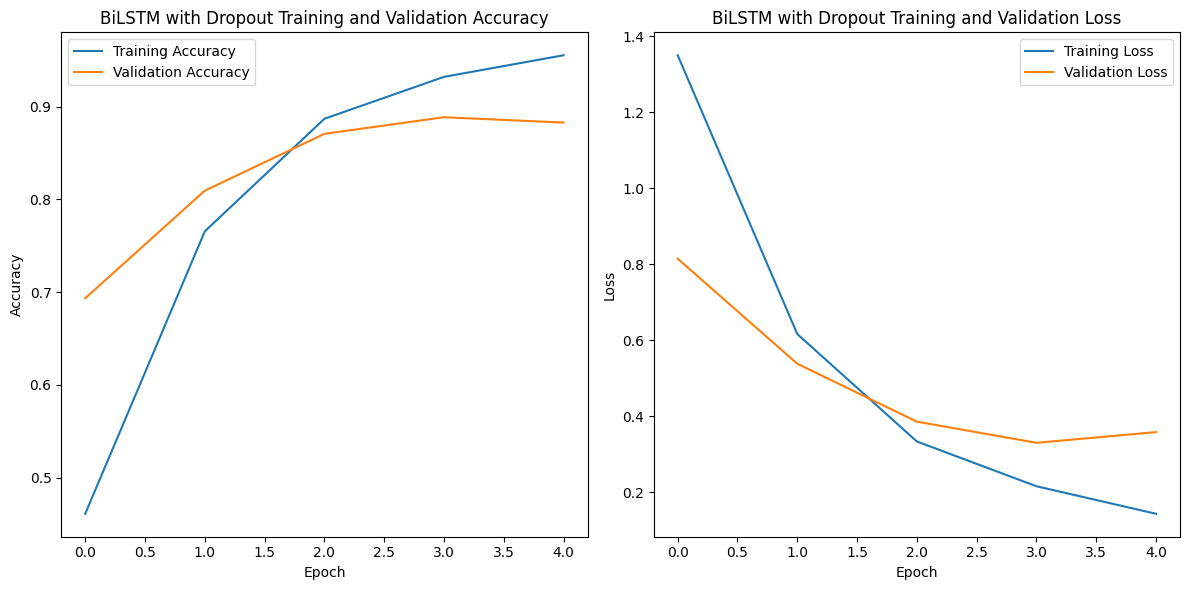

135/135 [==============================] - 15s 86ms/step


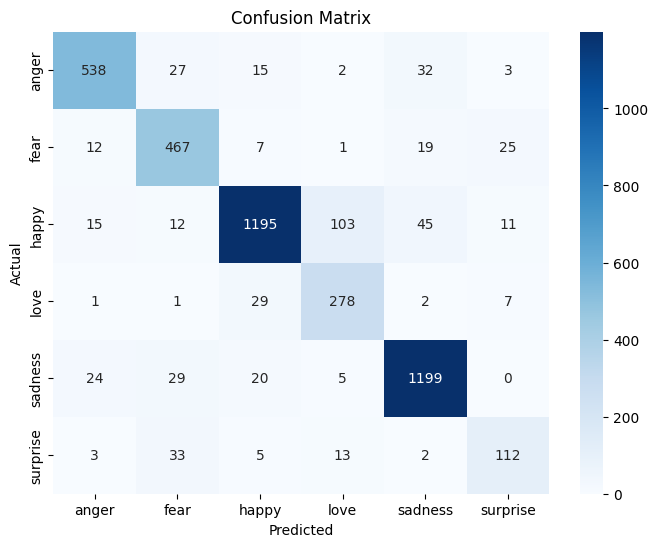

BiLSTM with Dropout Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       617
           1       0.82      0.88      0.85       531
           2       0.94      0.87      0.90      1381
           3       0.69      0.87      0.77       318
           4       0.92      0.94      0.93      1277
           5       0.71      0.67      0.69       168

    accuracy                           0.88      4292
   macro avg       0.83      0.85      0.84      4292
weighted avg       0.89      0.88      0.88      4292

Overall Precision: 0.8880943963042103
Overall Recall: 0.8828052190121156


In [44]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the number of units and dropout rate
lstm_units = 64  # You can change this to any desired number of units
dropout_rate = 0.3  # You can adjust the dropout rate as needed

# Build BiLSTM model with Dropout and different units
model_bilstm_custom = Sequential()
model_bilstm_custom.add(Embedding(max_words, 128, input_length=X.shape[1]))
model_bilstm_custom.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model_bilstm_custom.add(Dropout(dropout_rate))  # Add Dropout layer with the specified dropout rate
model_bilstm_custom.add(Bidirectional(LSTM(lstm_units)))
model_bilstm_custom.add(Dropout(dropout_rate))  # Add another Dropout layer
model_bilstm_custom.add(Dense(6, activation='softmax'))
model_bilstm_custom.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train BiLSTM model with Dropout and different units, and collect training history
history_bilstm_custom = model_bilstm_custom.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Evaluate BiLSTM model with Dropout and different units
bilstm_custom_loss, bilstm_custom_accuracy = model_bilstm_custom.evaluate(X_test, y_test)
print(f'BiLSTM with {lstm_units} units, Dropout, and Dropout Accuracy: {bilstm_custom_accuracy}')

# Plot training and validation accuracy/loss for BiLSTM with Dropout
plt.figure(figsize=(12, 6))

# Plot BiLSTM with Dropout accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bilstm_custom.history['accuracy'], label='Training Accuracy')
plt.plot(history_bilstm_custom.history['val_accuracy'], label='Validation Accuracy')
plt.title('BiLSTM with Dropout Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot BiLSTM with Dropout loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm_custom.history['loss'], label='Training Loss')
plt.plot(history_bilstm_custom.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM with Dropout Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
y_pred_bilstm_custom_probs = model_bilstm_custom.predict(X_test)
y_pred_bilstm_custom = np.argmax(y_pred_bilstm_custom_probs, axis=1)

# Plot BiLSTM with Dropout Confusion Matrix
conf_matrix_bilstm_custom = confusion_matrix(y_test, y_pred_bilstm_custom)
plot_confusion_matrix(conf_matrix_bilstm_custom, label_encoder.classes_)

# Classification Report
class_report_bilstm_custom = classification_report(y_test, y_pred_bilstm_custom)
print("BiLSTM with Dropout Classification Report:")
print(class_report_bilstm_custom)
from sklearn.metrics import precision_score, recall_score, classification_report

# Assuming y_test and y_pred_bilstm_custom are defined as in your code
y_true = y_test  # Replace with your true labels
y_pred = y_pred_bilstm_custom  # Replace with your predicted labels

# Calculate overall precision and recall (weighted average)
overall_precision = precision_score(y_true, y_pred, average='weighted')
overall_recall = recall_score(y_true, y_pred, average='weighted')

# Display overall precision and recall
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)


# BILSTM-UNIT(516),DROPOUT(0.5)

Epoch 1/5
135/135 [==============================] - 646s 5s/step - loss: 1.3088 - accuracy: 0.4852 - val_loss: 0.7880 - val_accuracy: 0.7043
Epoch 2/5
135/135 [==============================] - 622s 5s/step - loss: 0.5013 - accuracy: 0.8169 - val_loss: 0.5047 - val_accuracy: 0.8381
Epoch 3/5
135/135 [==============================] - 632s 5s/step - loss: 0.2584 - accuracy: 0.9131 - val_loss: 0.2664 - val_accuracy: 0.9054
Epoch 4/5
135/135 [==============================] - 626s 5s/step - loss: 0.1453 - accuracy: 0.9467 - val_loss: 0.2359 - val_accuracy: 0.9159
Epoch 5/5
135/135 [==============================] - 68s 504ms/step - loss: 0.2714 - accuracy: 0.9045
BiLSTM with 516 units, Dropout, and Dropout Accuracy: 0.9044734239578247


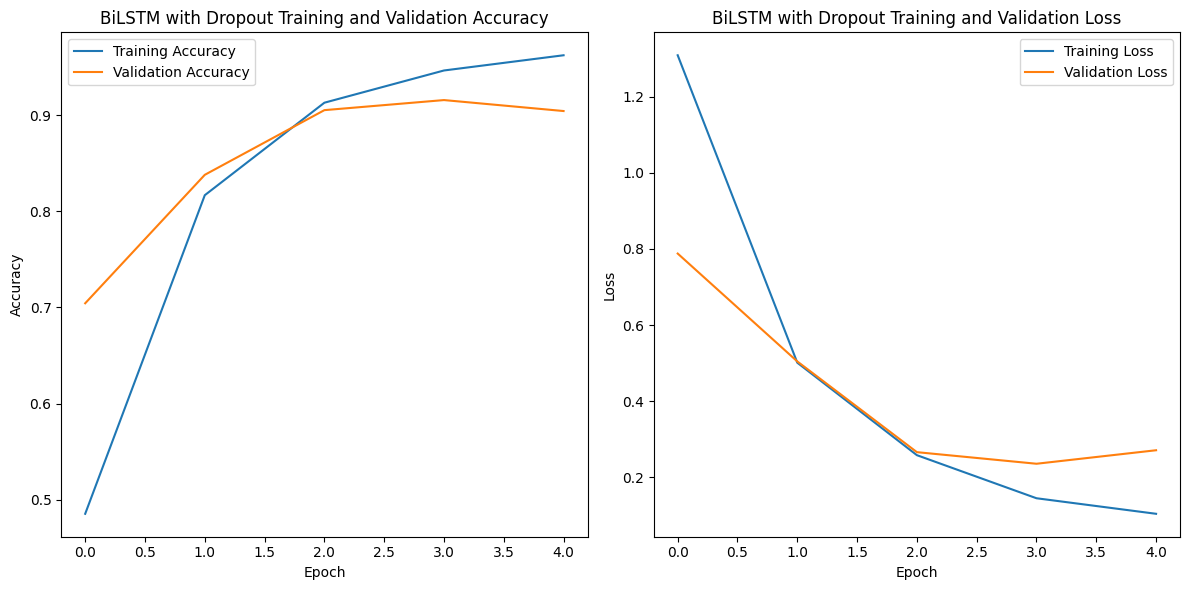

135/135 [==============================] - 71s 489ms/step


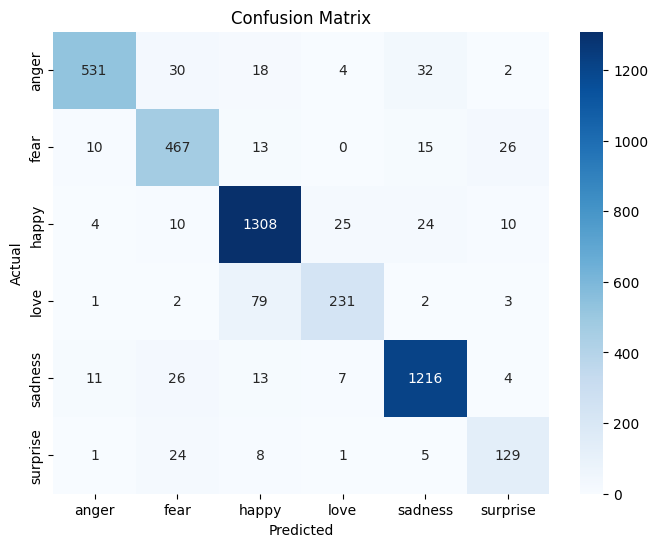

BiLSTM with Dropout Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       617
           1       0.84      0.88      0.86       531
           2       0.91      0.95      0.93      1381
           3       0.86      0.73      0.79       318
           4       0.94      0.95      0.95      1277
           5       0.74      0.77      0.75       168

    accuracy                           0.90      4292
   macro avg       0.87      0.86      0.86      4292
weighted avg       0.91      0.90      0.90      4292



In [31]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the number of units and dropout rate
lstm_units = 516
dropout_rate = 0.5

# Build BiLSTM model with Dropout and different units
model_bilstm_custom = Sequential()
model_bilstm_custom.add(Embedding(max_words, 128, input_length=X.shape[1]))
model_bilstm_custom.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model_bilstm_custom.add(Dropout(dropout_rate))  # Add Dropout layer with the specified dropout rate
model_bilstm_custom.add(Bidirectional(LSTM(lstm_units)))
model_bilstm_custom.add(Dropout(dropout_rate))  # Add another Dropout layer
model_bilstm_custom.add(Dense(6, activation='softmax'))
model_bilstm_custom.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train BiLSTM model with Dropout and different units, and collect training history
history_bilstm_custom = model_bilstm_custom.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Evaluate BiLSTM model with Dropout and different units
bilstm_custom_loss, bilstm_custom_accuracy = model_bilstm_custom.evaluate(X_test, y_test)
print(f'BiLSTM with {lstm_units} units, Dropout, and Dropout Accuracy: {bilstm_custom_accuracy}')

# Plot training and validation accuracy/loss for BiLSTM with Dropout
plt.figure(figsize=(12, 6))

# Plot BiLSTM with Dropout accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bilstm_custom.history['accuracy'], label='Training Accuracy')
plt.plot(history_bilstm_custom.history['val_accuracy'], label='Validation Accuracy')
plt.title('BiLSTM with Dropout Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot BiLSTM with Dropout loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm_custom.history['loss'], label='Training Loss')
plt.plot(history_bilstm_custom.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM with Dropout Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
y_pred_bilstm_custom_probs = model_bilstm_custom.predict(X_test)
y_pred_bilstm_custom = np.argmax(y_pred_bilstm_custom_probs, axis=1)

# Plot BiLSTM with Dropout Confusion Matrix
conf_matrix_bilstm_custom = confusion_matrix(y_test, y_pred_bilstm_custom)
plot_confusion_matrix(conf_matrix_bilstm_custom, label_encoder.classes_)

# Classification Report
class_report_bilstm_custom = classification_report(y_test, y_pred_bilstm_custom)
print("BiLSTM with Dropout Classification Report:")
print(class_report_bilstm_custom)


In [43]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Assuming y_test and y_pred_bilstm_custom are defined as in your code
y_true = y_test  # Replace with your true labels
y_pred = y_pred_bilstm_custom  # Replace with your predicted labels

# Calculate overall precision and recall (weighted average)
overall_precision = precision_score(y_true, y_pred, average='weighted')
overall_recall = recall_score(y_true, y_pred, average='weighted')

# Display overall precision and recall
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)



Overall Precision: 0.9051041273180281
Overall Recall: 0.9044734389561976


# COMPARISON

In [47]:
print(f'RNN Accuracy: {rnn_accuracy:.4f}')
print(f'LSTM Accuracy: {lstm_accuracy:.4f}')
print(f'BiLSTM Accuracy: {bilstm_accuracy:.4f}')

RNN Accuracy: 0.8108
LSTM Accuracy: 0.9021
BiLSTM Accuracy: 0.9136


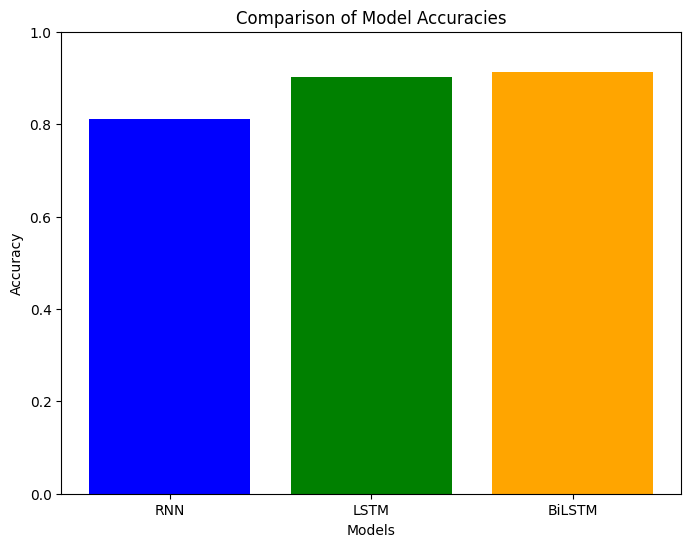

In [39]:
import matplotlib.pyplot as plt

models = ['RNN', 'LSTM', 'BiLSTM']

accuracies = [rnn_accuracy, lstm_accuracy, bilstm_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.show()

In [50]:
from tabulate import tabulate

# Function to evaluate the model and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall

# Models and their names
models = [model_rnn, model_bilstm, model_lstm]
model_names = ['RNN', 'BiLSTM', 'LSTM']

# Table headers
headers = ["Model", "Accuracy", "Precision", "Recall"]

# Data rows
data = []

# Loop through models, evaluate, and add to data
for model, name in zip(models, model_names):
    accuracy, precision, recall = evaluate_model(model, X_test, y_test)
    data.append([name, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"])

# Display the results in a table
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))



135/135 [==============================] - 6s 44ms/step
╒═════════╤════════════╤═════════════╤══════════╕
│ Model   │   Accuracy │   Precision │   Recall │
╞═════════╪════════════╪═════════════╪══════════╡
│ RNN     │     0.8108 │      0.807  │   0.8108 │
├─────────┼────────────┼─────────────┼──────────┤
│ BiLSTM  │     0.9136 │      0.9145 │   0.9136 │
├─────────┼────────────┼─────────────┼──────────┤
│ LSTM    │     0.9021 │      0.9032 │   0.9021 │
╘═════════╧════════════╧═════════════╧══════════╛


In [48]:
# Create a dictionary to store model accuracies
accuracies = {'RNN': rnn_accuracy, 'BiLSTM': bilstm_accuracy, 'LSTM': lstm_accuracy}

# Find the model with the highest accuracy
best_model = max(accuracies, key=accuracies.get)

# Print the result
print(f'The model with the highest accuracy is: {best_model} with accuracy {accuracies[best_model]:.4f}')


The model with the highest accuracy is: BiLSTM with accuracy 0.9136


# PREDICTION

In [51]:
emotion_mapping = {
    0: 'anger',
    1: 'fear',
    2: 'happy',
    3: 'love',
    4: 'sadness',
    5: 'surprise'
}

# User input
user_text = input("Enter a sentence: ")

# Tokenize and pad the user input text
user_sequence = tokenizer.texts_to_sequences([user_text])
user_padded_sequence = pad_sequences(user_sequence, maxlen=X.shape[1])

# Predict emotion using the LSTM model
user_pred_probs = model_lstm.predict(user_padded_sequence)
user_pred_label = np.argmax(user_pred_probs, axis=1)

# Decode the predicted emotion using the emotion mapping dictionary
user_emotion = emotion_mapping[user_pred_label[0]]

# Display the predicted emotion
print(f'The predicted emotion for "{user_text}" is: {user_emotion}')


Enter a sentence: i am feeling very high
1/1 [==============================] - 0s 317ms/step
The predicted emotion for "i am feeling very high" is: happy
